Ось **розгорнутий контент для файлу `06_plotting.ipynb`**, присвячений **візуалізації аналітичних даних військового характеру** за допомогою бібліотек `matplotlib` і `pandas`.

---

# 📘 `06_plotting.ipynb`

## **Тема: Побудова графіків у військовій аналітиці**

---

### 🔹 Вступ

Візуалізація — ключовий елемент аналітичного процесу у військових штабах. Графіки допомагають виявити динаміку втрат, ефективність дій, зміни у стані підрозділів та багато іншого.

---

## 🔸 1. Імпорт бібліотек

```python
import pandas as pd
import matplotlib.pyplot as plt
```

> **Підготуємо дані:**

```python
df = pd.read_csv("losses.csv", encoding="utf-8")
df["Дата"] = pd.to_datetime(df["Дата"])
df = df.sort_values("Дата")
```

---

## 🔸 2. Лінійний графік втрат за днями

```python
plt.plot(df["Дата"], df["Втрати"])
plt.title("Втрати противника за датами")
plt.xlabel("Дата")
plt.ylabel("Кількість втрат")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

---

## 🔸 3. Стовпчиковий графік втрат за напрямками

```python
grouped = df.groupby("Напрямок")["Втрати"].sum()

grouped.plot(kind="bar")
plt.title("Сумарні втрати по напрямках")
plt.ylabel("Втрати")
plt.xlabel("Напрямок")
plt.grid(axis='y')
plt.show()
```

---

## 🔸 4. Кругова діаграма участі підрозділів

```python
unit_sum = df.groupby("Підрозділ")["Втрати"].sum()

unit_sum.plot(kind="pie", autopct="%1.1f%%")
plt.title("Участь підрозділів у бойових діях (за втратами)")
plt.ylabel("")
plt.show()
```

---

## 🔸 5. Побудова декількох графіків одночасно

```python
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df.groupby("Напрямок")["Втрати"].sum().plot(kind="bar", ax=ax[0])
ax[0].set_title("Втрати по напрямках")

df.groupby("Підрозділ")["Втрати"].sum().plot(kind="bar", ax=ax[1])
ax[1].set_title("Втрати по підрозділах")

plt.tight_layout()
plt.show()
```

---

## 🔸 6. Збереження графіку у файл

```python
plt.plot(df["Дата"], df["Втрати"])
plt.title("Втрати противника")
plt.savefig("losses_plot.png", dpi=300)
```

---

## 📝 Практичні завдання:

1. Побудувати графік динаміки втрат по днях.
2. Створити стовпчикову діаграму сумарних втрат по напрямках.
3. Вивести кругову діаграму частки втрат підрозділів.
4. Побудувати два графіки на одному полотні: по напрямках і по підрозділах.
5. Зберегти один з графіків у формат `.png`.




Завдання 1. Побудувати графік динаміки втрат по днях.

In [4]:
pip install matplotlib


     ---------------------------------------- 0.0/108.7 kB ? eta -:--:--
     ---------- -------------------------- 30.7/108.7 kB 660.6 kB/s eta 0:00:01
     ----------------------------------- -- 102.4/108.7 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 108.7/108.7 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.1 MB 7.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.1 MB 7.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/8.1 MB 9.8 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.1 MB 9.5 MB/s eta 0:00:01
   -------- ------------------------------- 1.8/8.1 MB 9.3 MB/s eta 0:00:01
   -------- ------------------------------- 1.8/8.1 MB 9.3 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 7.9 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/8.1 MB 11.1 MB/s eta 0:00:01
   ------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\5103_2\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Оновлений DataFrame з колонкою 'Рівень загрози':
        Дата Напрямок  Втрати    Підрозділ Рівень загрози
0 2025-06-10     Схід     102    1-а мехбр        Низький
1 2025-06-11     Схід     134    1-а мехбр        Високий
2 2025-06-12  Південь      98   2-а танкбр        Низький
3 2025-06-13     Схід     145  3-я артбатр        Високий
4 2025-06-14  Південь      87   2-а танкбр        Низький
5 2025-06-15     Схід     110    1-а мехбр        Низький
6 2025-06-16  Південь     160   2-а танкбр        Високий
7 2025-06-17     Схід      90  3-я артбатр        Низький
--------------------------------------------------
Графік успішно збережено у файл: dynamics_of_losses.png


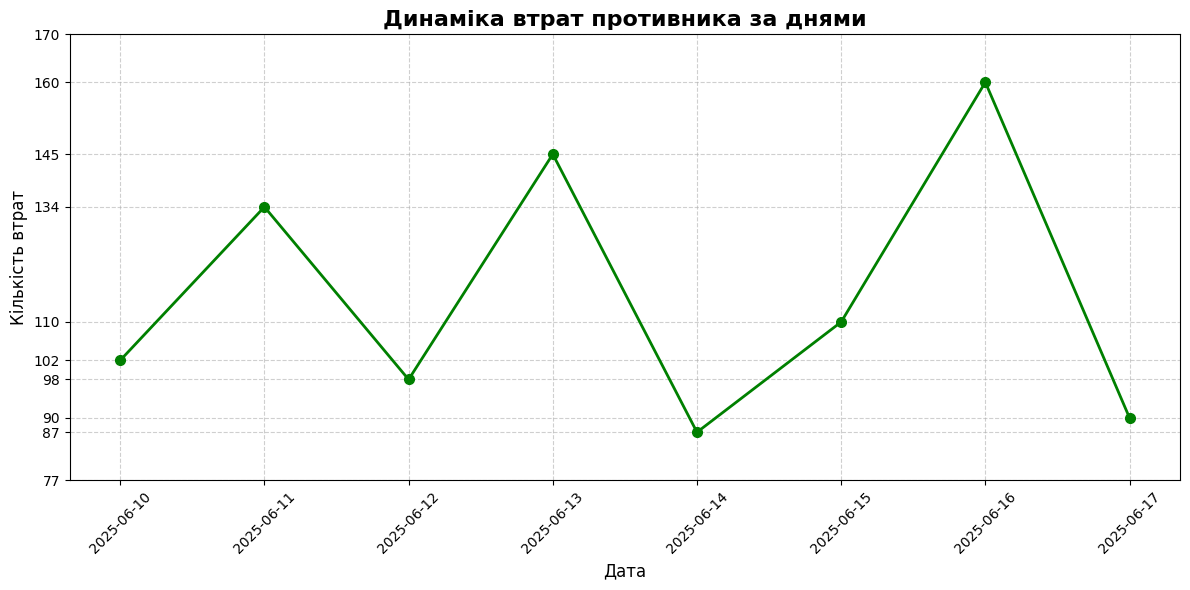

--------------------------------------------------
Аналіз завершено. Перевірте файл 'dynamics_of_losses.png' для перегляду графіка.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# --- 1. Дані для аналізу ---
# Ваші дані у вигляді рядка CSV.
# У реальному сценарії ви б читали їх з файлу: df = pd.read_csv("losses.csv", encoding="utf-8")
csv_data = """Дата,Напрямок,Втрати,Підрозділ
2025-06-10,Схід,102,1-а мехбр
2025-06-11,Схід,134,1-а мехбр
2025-06-12,Південь,98,2-а танкбр
2025-06-13,Схід,145,3-я артбатр
2025-06-14,Південь,87,2-а танкбр
2025-06-15,Схід,110,1-а мехбр
2025-06-16,Південь,160,2-а танкбр
2025-06-17,Схід,90,3-я артбатр"""

# --- 2. Завантаження та попередня обробка даних ---
df = pd.read_csv(StringIO(csv_data))

# Перетворення стовпця 'Дата' на тип datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Сортування DataFrame за датою для коректного відображення динаміки
df = df.sort_values(by='Дата')

# --- 3. Додавання нового стовпця "Рівень загрози" ---
# Логіка: "Високий", якщо втрати > 120, інакше "Низький"
df["Рівень загрози"] = df["Втрати"].apply(lambda x: "Високий" if x > 120 else "Низький")

print("Оновлений DataFrame з колонкою 'Рівень загрози':")
print(df)
print("-" * 50)

# --- 4. Побудова графіка динаміки втрат по днях ---
plt.figure(figsize=(12, 6)) # Задаємо розмір графіка

plt.plot(df['Дата'], df['Втрати'],
         marker='o',
         linestyle='-',
         color='green', # Змінимо колір лінії
         linewidth=2,
         markersize=7)

# Налаштування графіка
plt.title('Динаміка втрат противника за днями', fontsize=16, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кількість втрат', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.yticks(df['Втрати'].unique().tolist() + [min(df['Втрати']) - 10, max(df['Втрати']) + 10]) # Динамічні мітки на Y

plt.tight_layout()

# --- 5. Збереження графіка у файл ---
output_plot_filename = "dynamics_of_losses.png"
plt.savefig(output_plot_filename, dpi=300, bbox_inches='tight') # Зберігаємо з високою роздільною здатністю

print(f"Графік успішно збережено у файл: {output_plot_filename}")

# --- 6. Відображення графіка ---
plt.show()

print("-" * 50)
print("Аналіз завершено. Перевірте файл 'dynamics_of_losses.png' для перегляду графіка.")

Завдання 2. Створити стовпчикову діаграму сумарних втрат по напрямках.

Сумарні втрати по напрямках:
  Напрямок  Втрати
0  Південь     345
1     Схід     581
--------------------------------------------------
Стовпчикову діаграму успішно збережено у файл: total_losses_by_direction_bar_chart.png


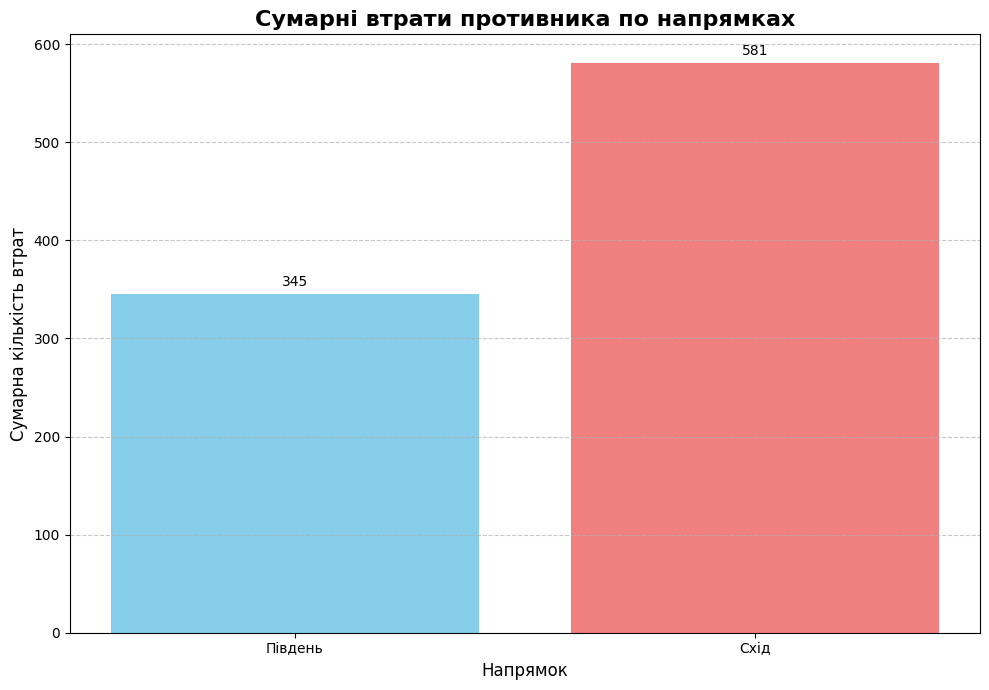

--------------------------------------------------
Аналіз завершено. Перевірте файл 'total_losses_by_direction_bar_chart.png' для перегляду діаграми.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# --- 1. Дані для аналізу ---
csv_data = """Дата,Напрямок,Втрати,Підрозділ
2025-06-10,Схід,102,1-а мехбр
2025-06-11,Схід,134,1-а мехбр
2025-06-12,Південь,98,2-а танкбр
2025-06-13,Схід,145,3-я артбатр
2025-06-14,Південь,87,2-а танкбр
2025-06-15,Схід,110,1-а мехбр
2025-06-16,Південь,160,2-а танкбр
2025-06-17,Схід,90,3-я артбатр"""

# --- 2. Завантаження та обробка даних ---
df = pd.read_csv(StringIO(csv_data))

# Групуємо дані за "Напрямком" і обчислюємо суму "Втрат" для кожного напрямку
# Цей крок є ключовим для стовпчикової діаграми сумарних втрат
total_losses_by_direction = df.groupby("Напрямок")["Втрати"].sum().reset_index()

print("Сумарні втрати по напрямках:")
print(total_losses_by_direction)
print("-" * 50)

# --- 3. Побудова стовпчикової діаграми ---
plt.figure(figsize=(10, 7)) # Задаємо розмір графіка

# Використовуємо plt.bar для побудови стовпчикової діаграми
# 'Напрямок' буде по осі X, 'Втрати' по осі Y
bars = plt.bar(total_losses_by_direction["Напрямок"],
               total_losses_by_direction["Втрати"],
               color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'mediumpurple']) # Можна задати кольори

# Додаємо значення на верх стовпців для кращої читабельності
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=10)


# --- 4. Налаштування графіка ---
plt.title('Сумарні втрати противника по напрямках', fontsize=16, fontweight='bold')
plt.xlabel('Напрямок', fontsize=12)
plt.ylabel('Сумарна кількість втрат', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7) # Сітка тільки по осі Y
plt.xticks(rotation=0) # Не потрібно повертати, якщо назви напрямків короткі
plt.tight_layout() # Автоматично налаштовуємо параметри

# --- 5. Збереження графіка у файл ---
output_bar_plot_filename = "total_losses_by_direction_bar_chart.png"
plt.savefig(output_bar_plot_filename, dpi=300, bbox_inches='tight')

print(f"Стовпчикову діаграму успішно збережено у файл: {output_bar_plot_filename}")

# --- 6. Відображення графіка ---
plt.show()

print("-" * 50)
print("Аналіз завершено. Перевірте файл 'total_losses_by_direction_bar_chart.png' для перегляду діаграми.")

Завдання 3. Вивести кругову діаграму частки втрат підрозділів.

Сумарні втрати по підрозділах:
Підрозділ
1-а мехбр      346
2-а танкбр     345
3-я артбатр    235
Name: Втрати, dtype: int64
--------------------------------------------------
Кругову діаграму успішно збережено у файл: unit_losses_pie_chart.png


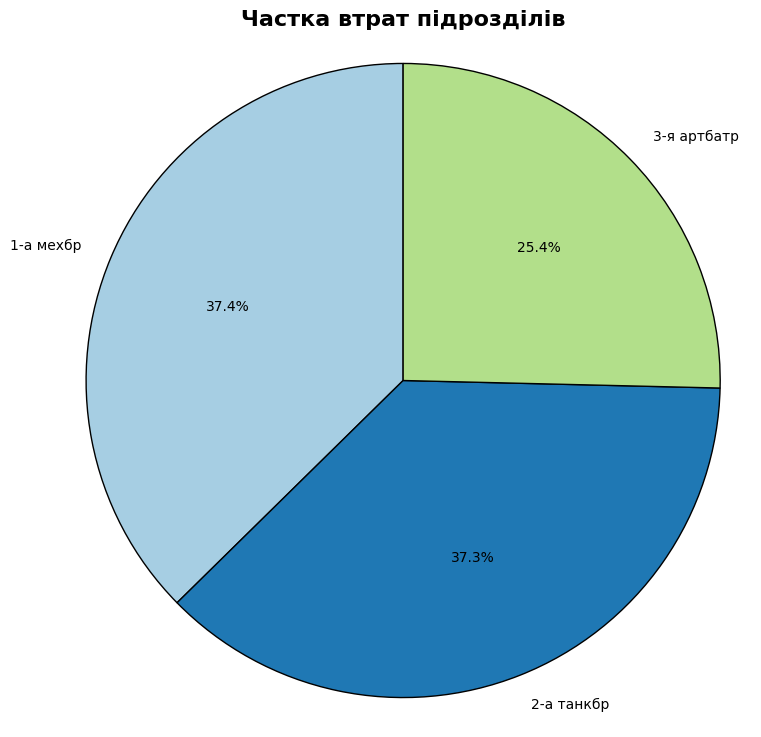

--------------------------------------------------
Аналіз завершено. Перевірте файл 'unit_losses_pie_chart.png' для перегляду діаграми.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# --- 1. Дані для аналізу ---
csv_data = """Дата,Напрямок,Втрати,Підрозділ
2025-06-10,Схід,102,1-а мехбр
2025-06-11,Схід,134,1-а мехбр
2025-06-12,Південь,98,2-а танкбр
2025-06-13,Схід,145,3-я артбатр
2025-06-14,Південь,87,2-а танкбр
2025-06-15,Схід,110,1-а мехбр
2025-06-16,Південь,160,2-а танкбр
2025-06-17,Схід,90,3-я артбатр"""

# --- 2. Завантаження та обробка даних ---
df = pd.read_csv(StringIO(csv_data))

# Групуємо дані за "Підрозділом" і обчислюємо суму "Втрат" для кожного підрозділу
total_losses_by_unit = df.groupby("Підрозділ")["Втрати"].sum()

print("Сумарні втрати по підрозділах:")
print(total_losses_by_unit)
print("-" * 50)

# --- 3. Побудова кругової діаграми ---
plt.figure(figsize=(9, 9)) # Задаємо розмір для кругової діаграми (квадратна форма краща)

# Використовуємо plt.pie для побудови кругової діаграми
# autopct='%1.1f%%' відображає відсотки на сегментах
# startangle=90 починає перший сегмент зверху
plt.pie(total_losses_by_unit,
        labels=total_losses_by_unit.index, # Назви підрозділів як мітки
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors, # Використовуємо палітру кольорів
        wedgeprops={'edgecolor': 'black'}) # Додаємо межі сегментів

# --- 4. Налаштування графіка ---
plt.title('Частка втрат підрозділів', fontsize=16, fontweight='bold')
plt.axis('equal') # Забезпечує малювання кола замість еліпса

# --- 5. Збереження графіка у файл ---
output_pie_chart_filename = "unit_losses_pie_chart.png"
plt.savefig(output_pie_chart_filename, dpi=300, bbox_inches='tight')

print(f"Кругову діаграму успішно збережено у файл: {output_pie_chart_filename}")

# --- 6. Відображення графіка ---
plt.show()

print("-" * 50)
print("Аналіз завершено. Перевірте файл 'unit_losses_pie_chart.png' для перегляду діаграми.")

Завдання 4. Побудувати два графіки на одному полотні: по напрямках і по підрозділах.

Сумарні втрати по напрямках:
Напрямок
Південь    345
Схід       581
Name: Втрати, dtype: int64

Сумарні втрати по підрозділах:
Підрозділ
1-а мехбр      346
2-а танкбр     345
3-я артбатр    235
Name: Втрати, dtype: int64
--------------------------------------------------
Об'єднані графіки успішно збережено у файл: losses_by_direction_and_unit_charts.png


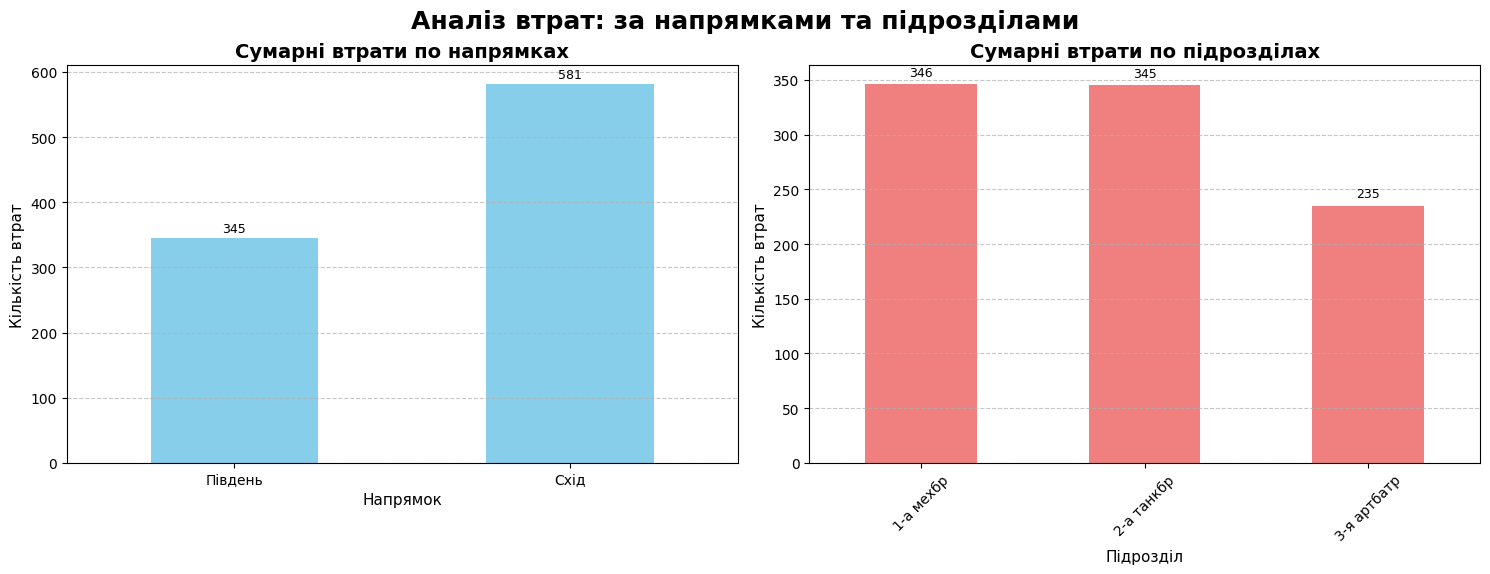

--------------------------------------------------
Аналіз завершено. Перевірте файл 'losses_by_direction_and_unit_charts.png' для перегляду діаграм.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# --- 1. Дані для аналізу ---
csv_data = """Дата,Напрямок,Втрати,Підрозділ
2025-06-10,Схід,102,1-а мехбр
2025-06-11,Схід,134,1-а мехбр
2025-06-12,Південь,98,2-а танкбр
2025-06-13,Схід,145,3-я артбатр
2025-06-14,Південь,87,2-а танкбр
2025-06-15,Схід,110,1-а мехбр
2025-06-16,Південь,160,2-а танкбр
2025-06-17,Схід,90,3-я артбатр"""

# --- 2. Завантаження та обробка даних ---
df = pd.read_csv(StringIO(csv_data))

# Групуємо дані для першого графіка: сумарні втрати по напрямках
total_losses_by_direction = df.groupby("Напрямок")["Втрати"].sum()

# Групуємо дані для другого графіка: сумарні втрати по підрозділах
total_losses_by_unit = df.groupby("Підрозділ")["Втрати"].sum()

print("Сумарні втрати по напрямках:")
print(total_losses_by_direction)
print("\nСумарні втрати по підрозділах:")
print(total_losses_by_unit)
print("-" * 50)

# --- 3. Побудова двох графіків на одному полотні ---
# Створюємо фігуру (полотно) і набір субграфіків (осей)
# 1 рядок, 2 колонки (sub-plots), figsize встановлює загальний розмір фігури
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # Збільшено ширину для кращого розділення

# --- Перший графік: Втрати по напрямках ---
ax1 = axes[0] # Вибираємо перші осі (ліворуч)
total_losses_by_direction.plot(kind="bar", ax=ax1, color='skyblue')

# Налаштування першого графіка
ax1.set_title("Сумарні втрати по напрямках", fontsize=14, fontweight='bold')
ax1.set_xlabel("Напрямок", fontsize=11)
ax1.set_ylabel("Кількість втрат", fontsize=11)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=0) # Без повороту для коротких назв

# Додаємо значення на верх стовпців
for i, v in enumerate(total_losses_by_direction):
    ax1.text(i, v + 5, str(v), color='black', ha='center', va='bottom', fontsize=9)


# --- Другий графік: Втрати по підрозділах ---
ax2 = axes[1] # Вибираємо другі осі (праворуч)
total_losses_by_unit.plot(kind="bar", ax=ax2, color='lightcoral')

# Налаштування другого графіка
ax2.set_title("Сумарні втрати по підрозділах", fontsize=14, fontweight='bold')
ax2.set_xlabel("Підрозділ", fontsize=11)
ax2.set_ylabel("Кількість втрат", fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=45) # Повертаємо для довших назв підрозділів

# Додаємо значення на верх стовпців
for i, v in enumerate(total_losses_by_unit):
    ax2.text(i, v + 5, str(v), color='black', ha='center', va='bottom', fontsize=9)


# --- Загальні налаштування фігури ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Оптимізуємо розташування та залишаємо місце для загального заголовка
fig.suptitle('Аналіз втрат: за напрямками та підрозділами', fontsize=18, fontweight='bold')


# --- 4. Збереження графіка у файл ---
output_multi_plot_filename = "losses_by_direction_and_unit_charts.png"
plt.savefig(output_multi_plot_filename, dpi=300, bbox_inches='tight')

print(f"Об\'єднані графіки успішно збережено у файл: {output_multi_plot_filename}")

# --- 5. Відображення графіка ---
plt.show()

print("-" * 50)
print("Аналіз завершено. Перевірте файл 'losses_by_direction_and_unit_charts.png' для перегляду діаграм.")

Завдання 5. Зберегти один з графіків у формат `.png`.

Графік успішно збережено у файл: dynamics_of_losses_plot.png


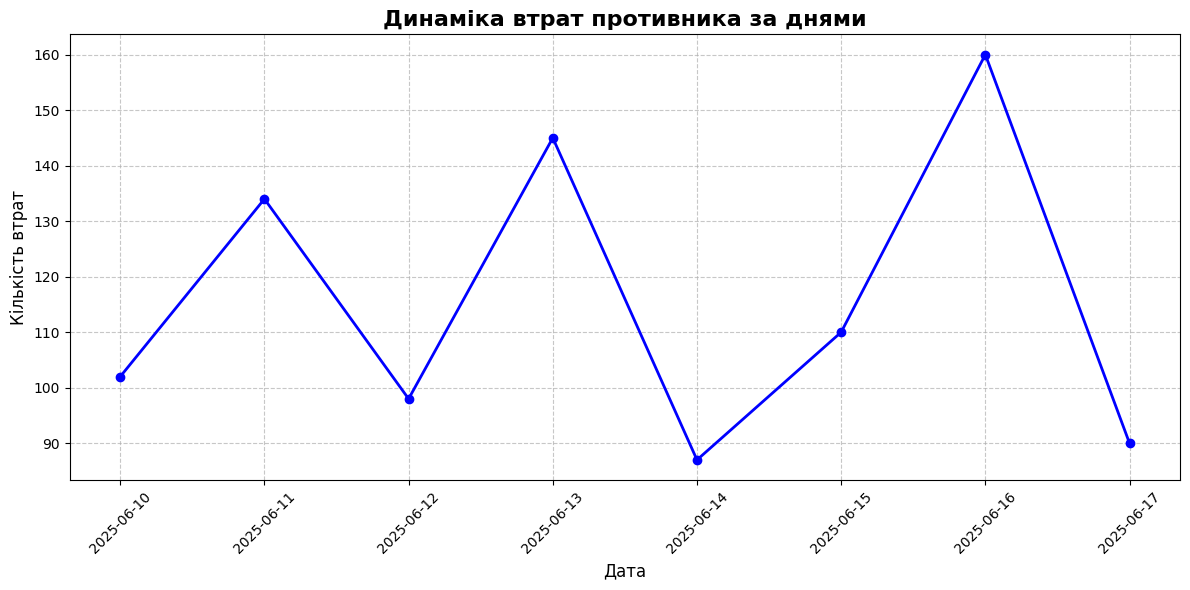

--------------------------------------------------
Програма завершила роботу.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# --- 1. Дані для аналізу ---
csv_data = """Дата,Напрямок,Втрати,Підрозділ
2025-06-10,Схід,102,1-а мехбр
2025-06-11,Схід,134,1-а мехбр
2025-06-12,Південь,98,2-а танкбр
2025-06-13,Схід,145,3-я артбатр
2025-06-14,Південь,87,2-а танкбр
2025-06-15,Схід,110,1-а мехбр
2025-06-16,Південь,160,2-а танкбр
2025-06-17,Схід,90,3-я артбатр"""

# --- 2. Завантаження та попередня обробка даних ---
df = pd.read_csv(StringIO(csv_data))

# Перетворення стовпця 'Дата' на тип datetime
df['Дата'] = pd.to_datetime(df['Дата'])

# Сортування DataFrame за датою
df = df.sort_values(by='Дата')

# --- 3. Побудова графіка динаміки втрат ---
plt.figure(figsize=(12, 6)) # Задаємо розмір графіка

plt.plot(df['Дата'], df['Втрати'],
         marker='o',
         linestyle='-',
         color='blue',
         linewidth=2,
         markersize=6)

# Налаштування графіка
plt.title('Динаміка втрат противника за днями', fontsize=16, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кількість втрат', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# --- 4. Збереження графіка у файл ---
output_plot_filename = "dynamics_of_losses_plot.png" # Назва файлу, куди буде збережено графік
plt.savefig(output_plot_filename, dpi=300, bbox_inches='tight') # Зберігаємо графік

print(f"Графік успішно збережено у файл: {output_plot_filename}")

# --- 5. Відображення графіка (за бажанням) ---
plt.show()

print("-" * 50)
print("Програма завершила роботу.")